<a href="https://colab.research.google.com/github/EhsanDrn2207/Deep-Learning-/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0


In [2]:
import numpy
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.constraints import max_norm
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [4]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [5]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
X_test.shape


(10000, 32, 32, 3)

In [7]:
y_train[0]


array([6], dtype=uint8)

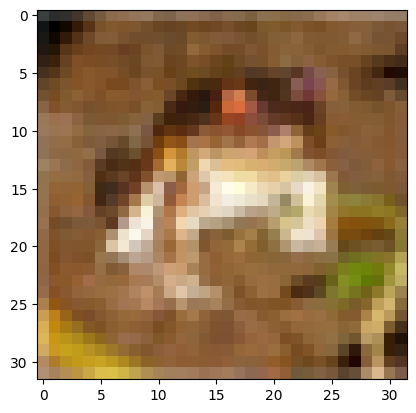

In [8]:
plt.imshow(X_train[0])


In [9]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:


# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
y_train[0]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [11]:
num_class = y_test.shape[1] #10


In [12]:
X_train.shape[1:]


(32, 32, 3)

## **Building The Model**

In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(num_class, activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │              

 Total params: 393,962 (1.50 MB)

 Trainable params: 393,322 (1.50 MB)

 Non-trainable params: 640 (2.50 KB)

## **Training the model**


In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.3828 - loss: 1.7428 - val_accuracy: 0.6027 - val_loss: 1.1222
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6088 - loss: 1.1121 - val_accuracy: 0.7058 - val_loss: 0.8366
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6768 - loss: 0.9287 - val_accuracy: 0.7083 - val_loss: 0.8347
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7085 - loss: 0.8372 - val_accuracy: 0.6768 - val_loss: 0.9109
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7321 - loss: 0.7677 - val_accuracy: 0.7613 - val_loss: 0.6777
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7559 - loss: 0.7039 - val_accuracy: 0.7618 - val_loss: 0.6879
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7653 - loss: 0.6711 - val_accuracy: 0.7293 - val_loss: 0.7949
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7785 - loss: 0.6350 - val_accur

In [17]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


In [18]:
import pandas as pd

<Axes: >

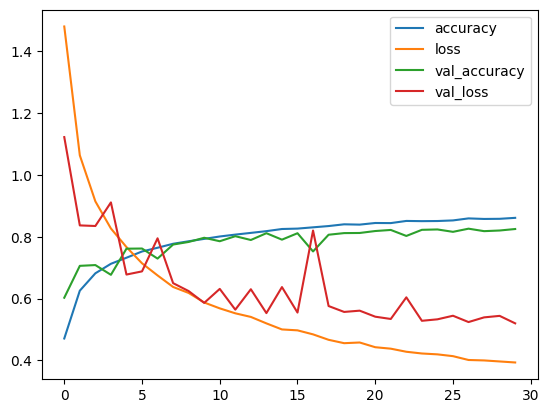

In [19]:
pd.DataFrame(history.history).plot()

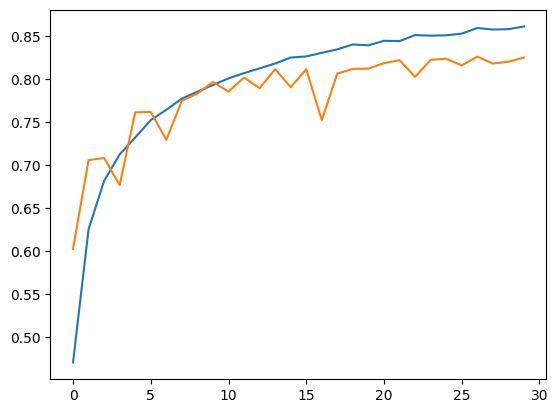

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [23]:
model.save('CNN_cifar10.keras')

In [24]:
model2 = load_model('CNN_cifar10.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [26]:
import numpy as np
import seaborn as sns; sns.set()

In [27]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


3

In [28]:
labels[3]

'cat'

In [29]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


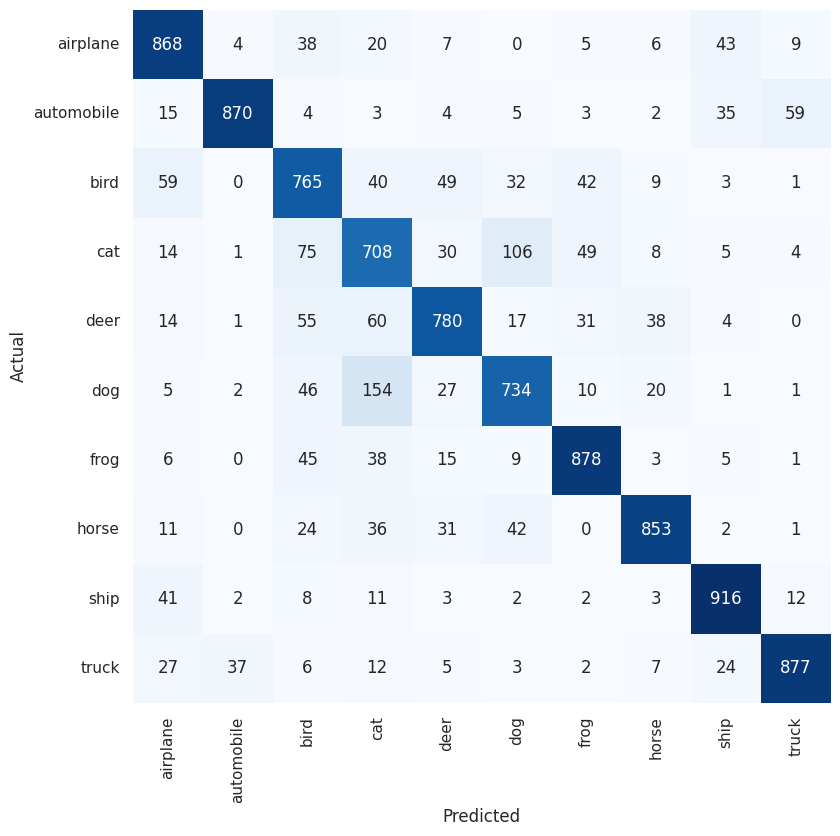

In [33]:
# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

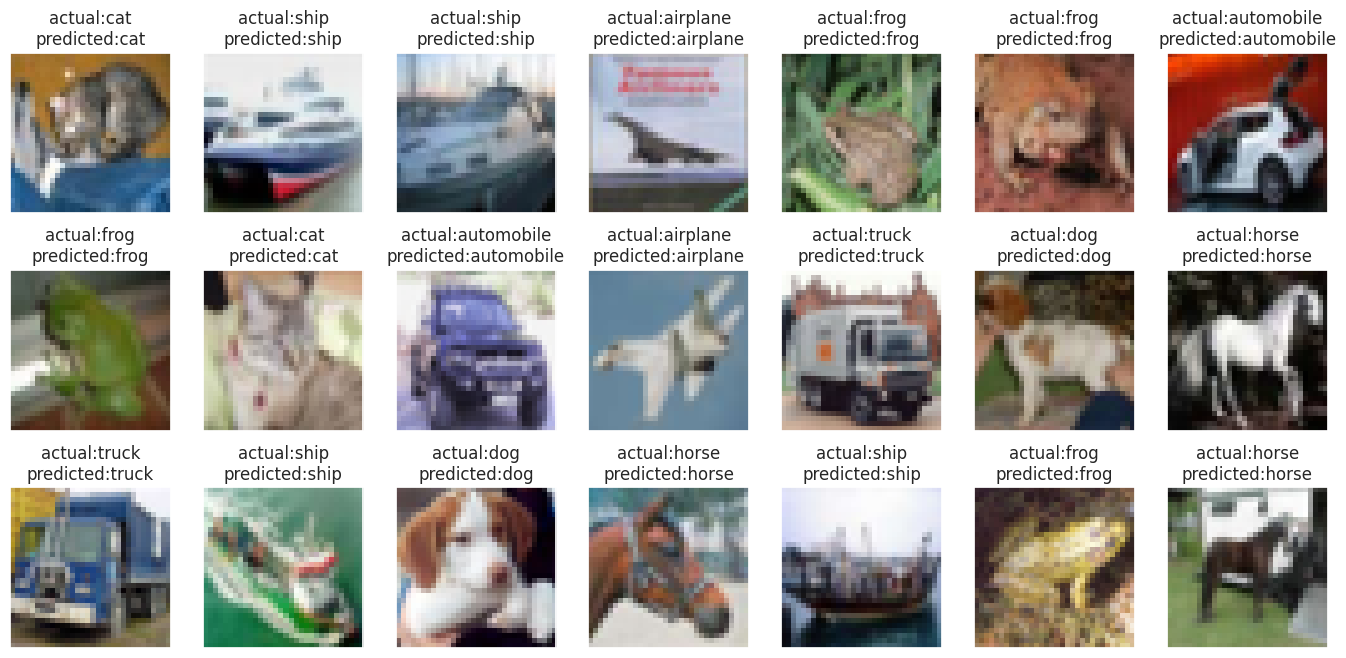

In [34]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()